<a target="_blank" href="https://colab.research.google.com/github/tuankhoin/CO3005-PPL/blob/main/Week_2_Lexer.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Ho Chi Minh University of Technology (HCMUT)

CO3005 - Principles of Programming Languages

# Week 2 - Lexical Analysis

FYI, the code in this notebook will make use of the [automata](https://github.com/caleb531/automata) package. Very helpful in aiding your knowledge of automaton.

In [ ]:
!apt install libgraphviz-dev
!pip install automata-lib coloraide pygraphviz

## 1. Position of Lexical Analysis in Compilation

A compiler transforms a **source program** into a **target program** through multiple phases. Lexical analysis is the **first phase of the compiler front-end**, and its output directly feeds the parser.

```
Source Program
   ↓
Lexical Analyzer -> You are here
   ↓
Syntax Analyzer
   ↓
Semantic Analyzer
   ↓
Intermediate Code Generation
   ↓
Optimization
   ↓
Code Generation
   ↓
Target Program
```

The lexical analyzer simplifies later phases by converting raw characters into structured units.

## 2. What Is Lexical Analysis?

Lexical analysis can be viewed as:

* **Word extraction**: grouping characters into meaningful units
  * Example: `i n` → `in`

* **Classification**: assigning categories to words
  * Example:

| I | am | a | student |
|---|----|---|---------|
| pronoun | verb | article | noun |

| Ngươi | xứng đáng | nhận | một | chày | từ | ta |
|-------|-----------|------|-----|------|----|----|
| danh từ (noun) | tính từ (adjective) | động từ (verb) | danh từ (noun) | danh từ (noun) | giới từ (preposition) | danh từ (noun) |

* **Filtering**: ignoring irrelevant characters such as whitespace and comments

- In grammar, words are categorised in dictionaries.
- But programming languages does not limit to a dictionary -> Need a rule to define.
- In programming languages, lexical analysis identifies **lexemes** and produces **tokens**.


## 3. Lexemes and Tokens

* **Lexeme**: a substring of the source program that matches a pattern
* **Token**: a pair `(token-name, attribute)` representing the lexeme’s category

Example:

```
result = oldsum - value / 100;
```

| Lexeme | Token Type  |
| ------ | ----------- |
| result | IDENT       |
| =      | ASSIGN_OP   |
| oldsum | IDENT       |
| -      | SUBTRACT_OP |
| value  | IDENT       |
| /      | DIV_OP      |
| 100    | INT_LIT     |
| ;      | SEMICOLON   |

The parser does not see characters—it sees **tokens**.


## 4. Lexical Analyzer

The lexical analyzer is responsible for:

* Identifying lexemes
* Returning tokens to the parser
* Ignoring whitespace (spaces, tabs, newlines)
* Recording token position information (line, column) for error reporting
* Performing **longest-prefix matching** when multiple rules apply

As mentioned, natural languages can be handled with dictionaries, but programming languages cannot.

* Identifiers: `a`, `abc`, `A1b`, `tempValue`, …
* Integers: `1`, `10`, `120`, `1000000`, …

The set is infinite.
Therefore, **lexical rules** are defined using **patterns**, not word lists.


## 5. Rule Representations

Lexical rules are commonly represented using:

* **Regular Expressions**
* **Finite Automata**

  * Deterministic Finite Automata (DFA)
  * Nondeterministic Finite Automata (NFA)

These form the theoretical foundation of lexical analysis.





## 7. Finite Automata (FA)

Fact: Finite Automata is also known as Finite State Machines (FSM). It is basically a diagram drawing that explains a function/mechanism.

A finite automaton consists of:

* An input tape (read-only)
* A finite set of states
* Transitions between states based on input symbols

At any time, the automaton:

* Reads one character
* Moves to the next state
* Accepts or rejects the input based on the final state

*Sounds familiar? Most board games work like that.*

## 8. Deterministic Finite Automata (DFA)

A **DFA** is defined as a 5-tuple:

```
M = (K, Σ, δ, s, F)
```

Where:

* `K` = finite set of states
* `Σ` = input alphabet
* `s` = start state
* `F` = set of final states
* `δ` = transition function `K × Σ → K`

In a DFA:

* Each `(state, input)` pair has **exactly one** next state




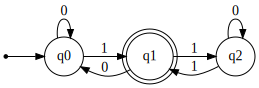

In [ ]:
from automata.fa.dfa import DFA

# DFA which matches all binary strings ending in an odd number of '1's
my_dfa = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)

my_dfa.show_diagram()

## 9. Nondeterministic Finite Automata (NFA)

An **NFA** allows:

* Multiple possible next states for the same input
* Transitions without consuming input (∈-transitions)
* *Fact: ∈ and ε, both are **epsilon** variants in Greek alphabet, but ε means very small, and ∈ means 'belong to'. In this case, either can be used to describe the empty transitions*

Key points:

* NFAs are easier to design (more simple)
* Every NFA can be converted into an equivalent DFA
* Regular expressions naturally map to NFAs


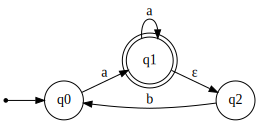

In [ ]:
from automata.fa.nfa import NFA

# NFA which matches strings beginning with "a", ending with "a", and
# containing no consecutive "b"s
my_nfa = NFA(
    states={"q0", "q1", "q2"},
    input_symbols={"a", "b"},
    transitions={
        "q0": {"a": {"q1"}},
        "q1": {"a": {"q1"}, "": {"q2"}},
        "q2": {"b": {"q0"}},
    },
    initial_state="q0",
    final_states={"q1"},
)

my_nfa.show_diagram()

## 10. Regular Expressions (RegEx)

Regular expressions describe **regular languages**, which are exactly the languages recognized by finite automata.

Basic operators:

| Operation      | Syntax | Meaning              |
|----------------|--------|----------------------|
| Concatenation  | `αβ`   | a then b             |
| Union          | `α \| β`| a or b               |
| Kleene star    | `α*`   | a appears 0 or more times |
| Empty string   | `∈`    | empty string         |
| Grouping       | `( )`  | parentheses for grouping |

Examples:

| RE           | Language                                   |
|--------------|--------------------------------------------|
| 0            | { 0 }                                      |
| 01           | { 01 }                                     |
| 0 \| 1        | { 0, 1 }                                   |
| 0(0\|1)       | { 00, 01 }                                 |
| (0\|1)(0\|1)   | { 00, 01, 10, 11 }                         |
| 0*           | { ∈, 0, 00, 000, 0000, ... }               |
| (0\|1)*       | { ∈, 0, 1, 00, 01, 10, 11, 000, 001, ... } |


## 11. Regular Expressions in Lexical Rules

Example patterns:

* Pascal keyword `if` (case-insensitive):

  ```
  (i|I)(f|F)
  ```

* Scientific notation:

  ```
  [Ee][+-]?[0-9]+

  or

  (E|e)(+|-|∈)(0|1|2|3|4|5|6|7|8|9)+
  ```

* An E followed by a (possibly empty) sequence of digits (E, E1, E36, E699999,...)

  ```
  E(0|1|2|3|4|5|6|7|8|9)*

  or

  E[0-9]*
  ```

Convenience notation:

| Syntax   | Meaning                                      |
|----------|----------------------------------------------|
| α+       | one or more (i.e. αα∗)                       |
| α?       | 0 or 1 (i.e. (α \∣ ∈))                        |
| [xyz]    | x \∣ y \∣ z                                    |
| [x-y]    | all characters from x to y, e.g. [0-9] = all ASCII digits |
| [^x-y]   | all characters other than [x-y]              |
| .        | matches any character                        |



## 12. Relationship Between Regex and Automata

* Regular expressions ↔ NFAs
* NFAs → DFAs
* DFAs → Efficient lexer implementation

Lexers internally operate like DFAs, even if written using regex rules.

In [ ]:
from automata.fa.gnfa import GNFA

# Convert our implemented NFA to a regular expression
regex = GNFA.from_nfa(my_nfa).to_regex()
# Outputs the equivalent regular expression
print(f'NFA regex equivalent: {regex}')

# Convert our implemented DFA to regex
regex = GNFA.from_dfa(my_dfa).to_regex()
print(f'DFA regex equivalent: {regex}')

NFA regex equivalent: a(ba|a)*
DFA regex equivalent: 0*1(00*1|10*1)*


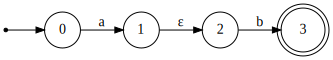

In [ ]:
# Example 1: regex ab → NFA
nfa_ab = NFA.from_regex('ab')
nfa_ab.show_diagram()

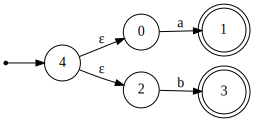

In [ ]:
# Example 2: regex a|b → NFA
nfa_a_or_b = NFA.from_regex('a|b')
nfa_a_or_b.show_diagram()

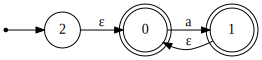

In [ ]:
# Example 3: regex a* → NFA
nfa_a_star = NFA.from_regex('a*')
nfa_a_star.show_diagram()

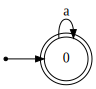

In [ ]:
dfa_a_star = DFA.from_nfa(nfa_a_star, minify=True)
dfa_a_star.show_diagram()

## 13. Lexer Behavior

A lexical analyzer:

* Scans left to right
* Applies **longest-prefix matching**
* May look ahead without consuming input
* Emits one token at a time

This ensures correctness when multiple rules overlap.


## 14. Lexer Generation with ANTLR

ANTLR (ANother Tool for Language Recognition) is a popular lexer/parser generator.

Example lexer rules:

```antlr
lexer grammar Hello;

INT : [0-9]+ ;
HEX : '0' [Xx] [0-9A-Fa-f]+ ;
ID  : [a-z]+ ;
WS  : [ \t\r\n]+ -> skip ;
```

ANTLR automatically:

* Builds automata from regex rules
* Resolves conflicts
* Generates efficient lexer code

Read through [here](https://github.com/antlr/antlr4/blob/master/doc/getting-started.md) and [here](https://github.com/antlr/antlr4/blob/master/doc/lexer-rules.md#lexer-rule-elements) to further understand this code concept.

You write a grammar file (.g4) that defines:
* Lexer rules → how characters form tokens
* Parser rules → how tokens form syntactic structures
* ANTLR turns this grammar into:
  * A Lexer (token stream) (UPPERCASE)
  * A Parser (parse tree) (lowercase)
  * Optional visitor/listener classes for tree traversal

```
grammar Expr;

expr   : expr '+' term
       | term
       ;

term   : INT
       ;

INT    : [0-9]+ ;
WS     : [ \t\r\n]+ -> skip ;

```

This grammar recognizes simple addition expressions like `1+2+3`. Let's name this file is `Expr.g4`!
- `INT`, `WS`: lexer
  - rules are RegEx
  - `-> skip`: ignore tokens
- `expr`, `term`: parser



In [ ]:
!pip install antlr4-tools
!pip install antlr4-python3-runtime

In [ ]:
!pip freeze | grep antlr4

antlr4-python3-runtime==4.9.3
antlr4-tools==0.2.2


In [ ]:
# Compile. Once successfully compiled, will give you ExprXXX.py files that you are running next
!antlr4 -Dlanguage=Python3 Expr.g4
!ls

Expr.g4      ExprLexer.interp  ExprLexer.tokens  ExprParser.py	sample_data
Expr.interp  ExprLexer.py      ExprListener.py	 Expr.tokens


Running GUI on the Terminal

```
antlr4-parse Expr.g4 prog -gui
10+20+30
(EOF - Ctrl + D on Unix or Crtl + Z on Windows)
```

## 15. Summary

* Lexical analysis is **pattern matching over characters**
* It converts raw text into tokens
* Rules are defined using **regular expressions**
* Regular expressions are implemented via **finite automata**
* Tools like **ANTLR** automate lexer construction

Lexical analysis isolates low-level concerns, allowing later phases to reason about program structure and meaning.